# 1. Load Data
The dataset is downloaded from [Finance Yahoo - Apple Inc. (AAPL) Stock History](https://finance.yahoo.com/quote/AAPL/history?period1=1553731200&period2=1711584000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true).

The dataset includes data from 1980-12-12 to 2024-03-27.

In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected = True)

In [3]:
#import warnings
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
# import data
data = pd.read_csv(r"/Users/macbookair/Documents/PERSONAL-PROJECT/AAPL.csv")

data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087117,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600


# 2. Data Cleaning
I will go over these following items:
* Duplicated rows
* Null rows
* Invalid dtypes

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10913 entries, 0 to 10912
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10913 non-null  object 
 1   Open       10913 non-null  float64
 2   High       10913 non-null  float64
 3   Low        10913 non-null  float64
 4   Close      10913 non-null  float64
 5   Adj Close  10913 non-null  float64
 6   Volume     10913 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 596.9+ KB


This dataset has 10913 entries and 7 columns. The Date columns has object type, I will change this into DateTime type.

In [6]:
# Change object dtype into Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
# Get the dtypes of all columns
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [8]:
# Find the total number of null values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
# Find the total number of duplicated values
data.duplicated().sum()

0

# 3. Add New Column and Create a Data Sample
When analyzing stock prices, price change is an important value to look at.

In [10]:
# Add a column that represents daily stock price percentage change
data['Adj_Close_Change'] = data['Adj Close'].pct_change()*100

# Add a column that represents the absolute value of daily stock price percentage change
data['Abs_Adj_Close_Change'] = np.absolute(data['Adj_Close_Change'])

Apple's stock price over 23 years has changed a lot, and sometimes looking at historical data dated too far back might not produce meaningful results that reflect well the current social and economic context. Because of that, I will focus on 5-year data, from 2019-01-01 to 2024-03-27.

In [11]:
# Create a new DataFrame that contains data from 2019-01-01 to 2024-03-27
recent_data = data[data['Date'] >= '2019-01-01']

In [12]:
# Set "Date" as the index
recent_data.set_index('Date', inplace = True)

In [13]:
recent_data.describe()

,Open,High,Low,Close,Adj Close,Volume,Adj_Close_Change,Abs_Adj_Close_Change
count,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1.318000e+03,1318.000000,1318.000000
mean,125.593507,127.009647,124.276904,125.715687,124.167147,9.978507e+07,0.135678,1.412258
std,47.105117,47.505408,46.693634,47.114944,47.415135,5.222109e+07,2.003961,1.427689
min,35.994999,36.430000,35.500000,35.547501,34.075397,2.404830e+07,-12.864685,0.000000
25%,79.043127,79.825626,78.306249,79.219376,77.277945,6.590982e+07,-0.818392,0.460698
50%,137.370002,139.409996,135.665001,137.370002,135.888748,8.722530e+07,0.115678,1.008792
75%,164.564998,166.345005,162.987499,165.057506,163.460701,1.170909e+08,1.220320,1.924204
max,198.020004,199.619995,197.000000,198.110001,197.857529,4.265100e+08,11.980829,12.864685


# 4. Data Visualization
## 4.1. What are the daily prices overtime?
### Simple line charts

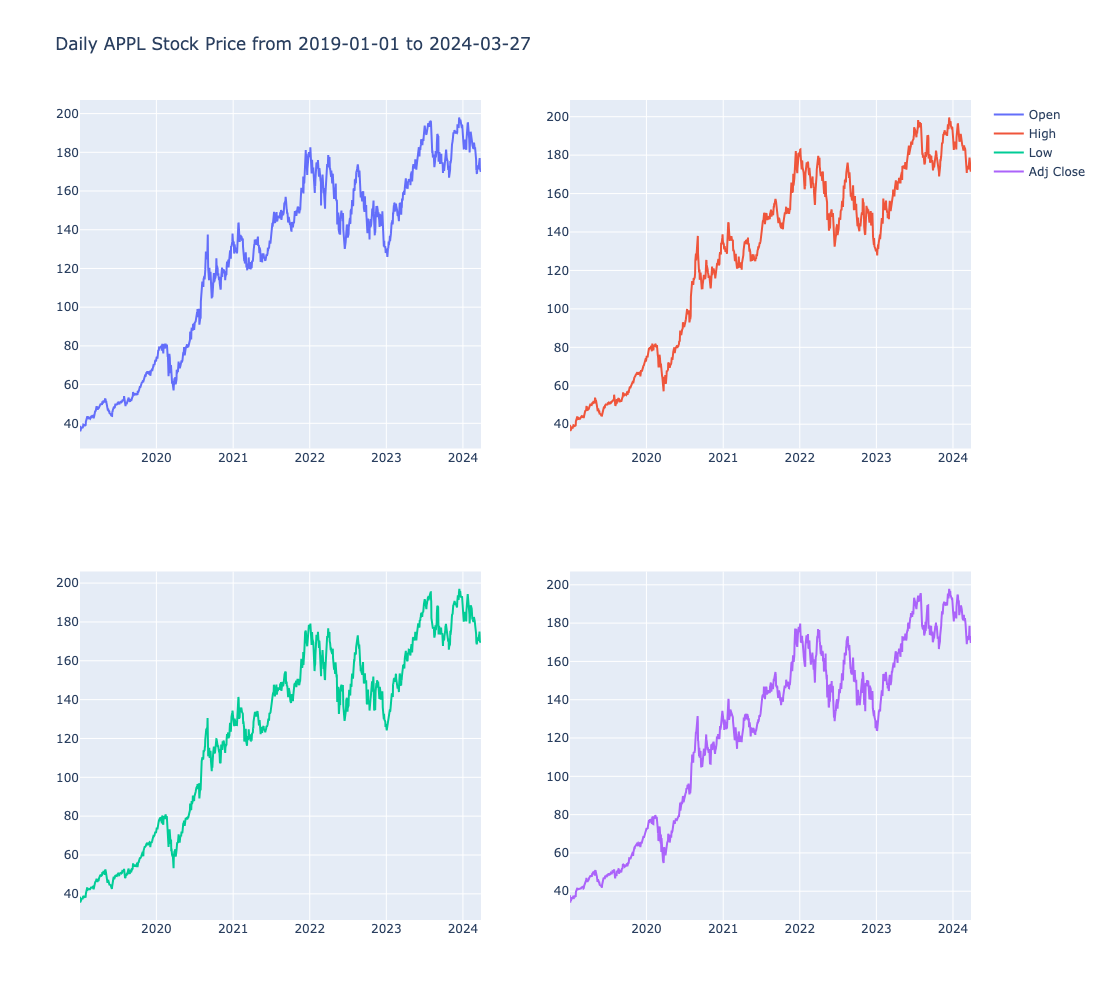

In [14]:
fig = make_subplots(rows = 2, cols = 2)
column_names = ['Open', 'High', 'Low', 'Adj Close']
r = 1
c = 1

for i in column_names:
    fig.append_trace(go.Scatter(x = recent_data.index, y = recent_data[i], mode = 'lines', name = i), row = r, col = c)
    c = c + 1
    if c == 3:
        c = 1
        r = r + 1

fig.update_layout(autosize = False, width = 1100, height = 1000, title = 'Daily APPL Stock Price from 2019-01-01 to 2024-03-27')
fig.update_traces(hovertemplate = 'Date: %{x|%Y-%m-%d}, %{y}')
fig.show()

In general, Apple's stock price has a trend of going up over the 5 years. The Open, Close, High, Low stock prices have similar patterns. There are a few points to notice:
* Apple's stock price skyrocketed in 2020 admist the global pandemic COVID-19. This might be due to lockdown policies that asked people to work and study remotely, increasing the demand for electronic devices such as smartphones, laptops, computers, etc.
* Apple's stock price experienced significant drops in the middle of 2022 and at the beginning of 2023.
* But after the drop, it soared up again till August 2023, flutuating through 2024. 

### Candlestick vs Volume chart
A Candlestick chart with 4 values (Open, High, Low, and Close) can be displayed better over a shorter timeframe. Below is a Candlestick vs Volume chart, one can use the slider to control the period they want to see.

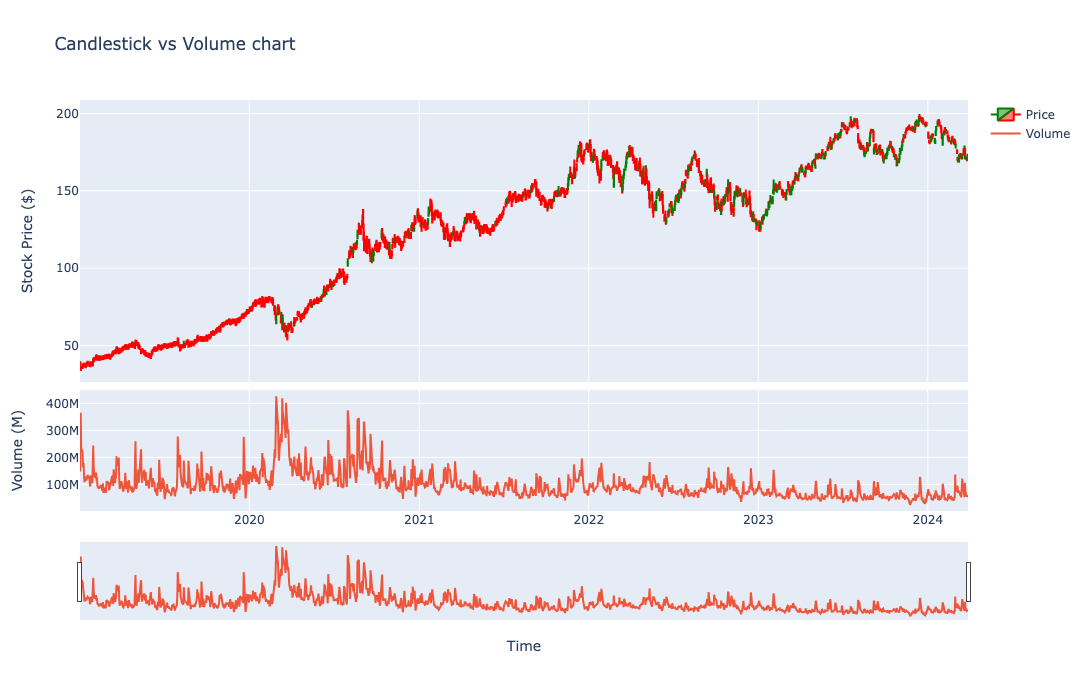

In [15]:
fig2 = make_subplots(rows = 2, cols = 1, shared_xaxes = True, vertical_spacing = 0.02, row_heights = [0.7, 0.3])
fig2.append_trace(go.Candlestick(x = recent_data.index, 
                                 high = recent_data['High'], 
                                 open = recent_data['Open'], 
                                 close = recent_data['Adj Close'], 
                                 low = recent_data['Low'], 
                                 increasing_line_color = 'green', 
                                 decreasing_line_color = 'red', 
                                 name = 'Price'),
                  row = 1, col = 1)

fig2.append_trace(go.Scatter(x = recent_data.index, 
                             y = recent_data['Volume'], 
                             name = 'Volume', 
                             mode = 'lines'), 
                  row = 2, col = 1)
fig2.update_layout(title = 'Candlestick vs Volume chart', 
                   yaxis1_title = 'Stock Price ($)', yaxis2_title = 'Volume (M)', 
                   xaxis2_title = 'Time', 
                   xaxis1_rangeslider_visible = False, xaxis2_rangeslider_visible = True, 
                   autosize = False, width = 1100, height = 700)
fig2.show()

## 4.2. Logarithm Scale of Closing Price

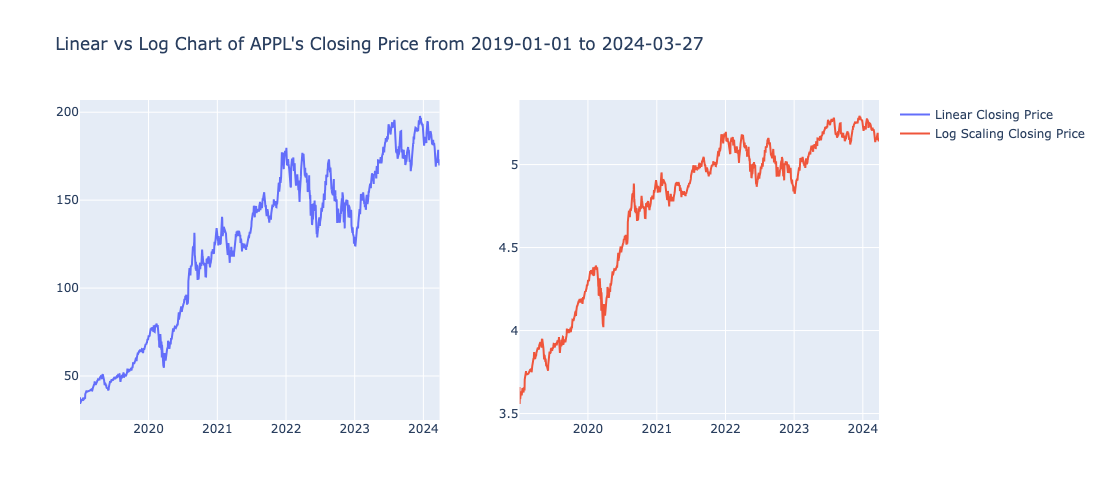

In [16]:
fig3 = make_subplots(rows = 1, cols = 2)
fig3.append_trace(go.Scatter(x = recent_data.index, y = recent_data['Adj Close'], mode = 'lines', 
                             name = 'Linear Closing Price'), row = 1, col = 1)
fig3.append_trace(go.Scatter(x = recent_data.index, y = np.log1p(recent_data['Adj Close']), mode = 'lines', 
                             name = 'Log Scaling Closing Price'), row = 1, col = 2)
fig3.update_layout(autosize = False, width = 1100, height = 500, title = "Linear vs Log Chart of APPL's Closing Price from 2019-01-01 to 2024-03-27")
fig3.update_traces(hovertemplate = 'Date: %{x|%Y-%m-%d}, %{y}')
fig3.show()

Log scale charts will show percentage change in stock price more equally. The growth in Apple's Stock Price from 2019 to the beginning of 2021 was robust. Stock price trend three years later from 2021 to the beginning of 2024 was less severe and more stable.

## 4.3. Closing Price on Yearly, Quarterly, Monthly, Weekly basis

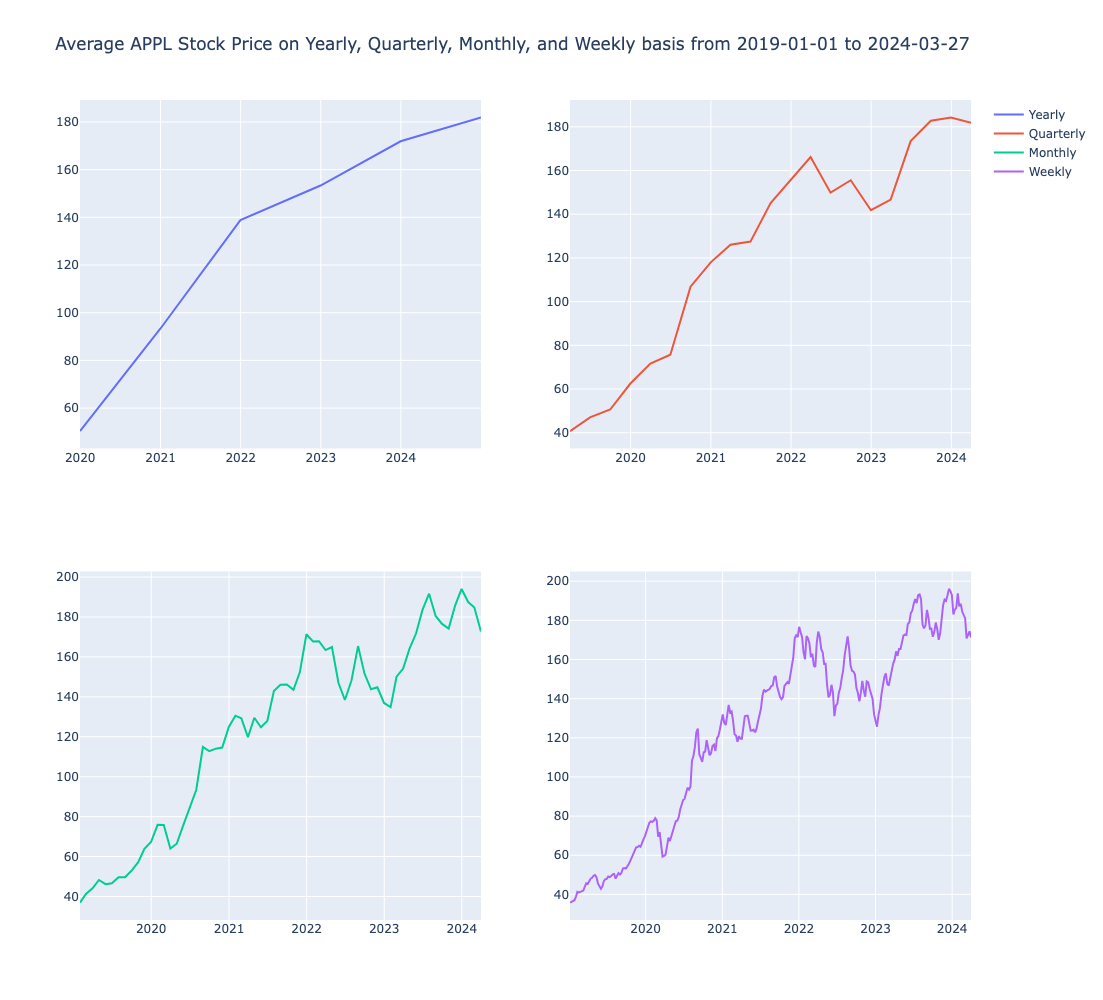

In [17]:
fig4 = make_subplots(rows = 2, cols = 2)
rule = {'Y':'Yearly', 'Q':'Quarterly', 'M':'Monthly', 'W': 'Weekly'}
r = 1
c = 1

for i in rule:
    fig4.append_trace(go.Scatter(x = recent_data['Adj Close'].resample(i).mean().index, y = recent_data['Adj Close'].resample(i).mean(), 
                                 mode = 'lines', name = rule[i]), row = r, col = c)
    c = c + 1
    if c == 3:
        c = 1
        r = r + 1

fig4.update_layout(autosize = False, width = 1100, height = 1000, title = 'Average APPL Stock Price on Yearly, Quarterly, Monthly, and Weekly basis from 2019-01-01 to 2024-03-27')
fig4.update_traces(hovertemplate = 'Date: %{x|%Y-%m-%d}, %{y}')
fig4.show()

## 4.4. Daily Change in Closing Price

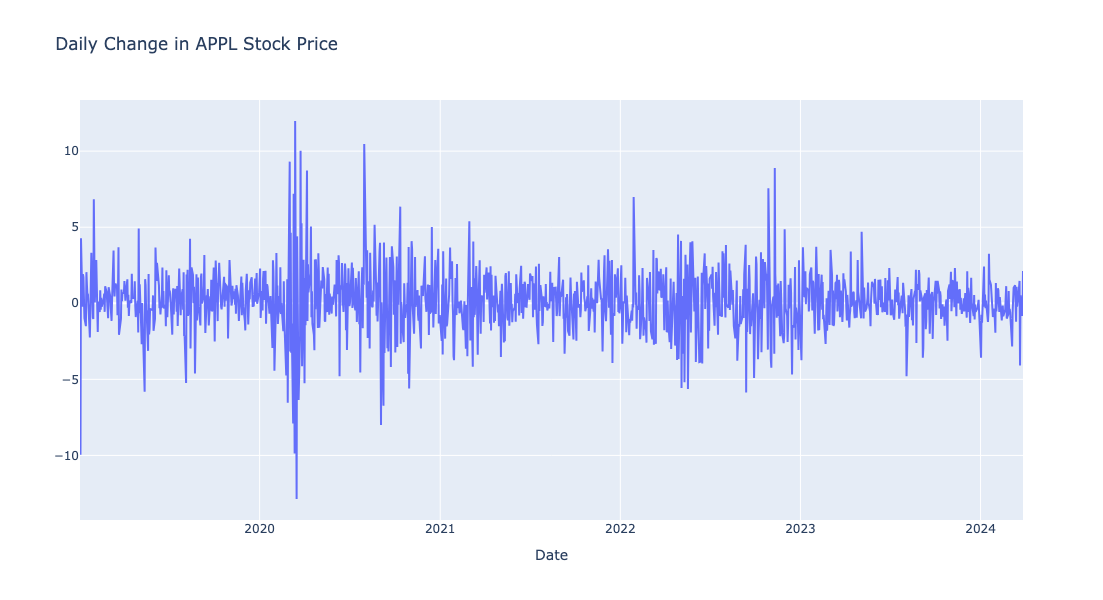

In [18]:
trace = go.Scatter(x = recent_data.index, y = recent_data['Adj_Close_Change'], mode = 'lines')
layout = {'title' : 'Daily Change in APPL Stock Price', 'xaxis' : {'title':'Date'}}
fig5 = go.Figure(data = [trace], layout = layout)
fig5.update_traces(hovertemplate = 'Date: %{x|%Y-%m-%d}, %{y}')
fig5.update_layout(autosize = False, width = 1100, height = 600)
fig5.show()

In [19]:
# a closer look on top 10 dates with most significant Closing Price Change
recent_data.sort_values(by = 'Abs_Adj_Close_Change', ascending = False).head(10)

,Open,High,Low,Close,Adj Close,Volume,Adj_Close_Change,Abs_Adj_Close_Change
Date,,,,,,,,
2020-03-16,60.487499,64.769997,60.000000,60.552502,59.056839,322423600,-12.864685,12.864685
2020-03-13,66.222504,69.980003,63.237499,69.492500,67.776009,370732000,11.980829,11.980829
2020-07-31,102.885002,106.415001,100.824997,106.260002,103.915901,374336800,10.468881,10.468881
2020-03-24,59.090000,61.922501,58.575001,61.720001,60.195499,287531200,10.032533,10.032533
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.075397,365248800,-9.960730,9.960730
2020-03-12,63.985001,67.500000,62.000000,62.057499,60.524654,418474000,-9.875479,9.875479
2020-03-02,70.570000,75.360001,69.430000,74.702499,72.857323,341397200,9.310069,9.310069
2022-11-10,141.240005,146.869995,139.500000,146.869995,145.867508,118854000,8.897456,8.897456
2020-04-06,62.724998,65.777496,62.345001,65.617500,63.996738,201820400,8.723767,8.723767


# 5. Automation Data Visualization

In [20]:
def stock_price_viz (data, start_date, end_date):
    # preprocessing
    recent_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    recent_data['Adj_Close_Change'] = recent_data['Adj Close'].pct_change()*100
    recent_data['Abs_Adj_Close_Change'] = np.absolute(recent_data['Adj_Close_Change'])
    recent_data = recent_data.set_index('Date')
    
    # basic descriptive analysis
    print("Basic descriptive analysis:")
    print(recent_data.describe().T)
    
    # simple linear charts
    fig = make_subplots(rows = 2, cols = 2)
    column_names = ['Open', 'High', 'Low', 'Adj Close']
    r = 1
    c = 1
    for i in column_names:
        fig.append_trace(go.Scatter(x = recent_data.index, y = recent_data[i], mode = 'lines', name = i), row = r, col = c)
        c = c + 1
        if c == 3:
            c = 1
            r = r + 1
    fig.update_layout(autosize = False, width = 1100, height = 1000, title = 'Daily Stock Price')
    fig.update_traces(hovertemplate = 'Date: %{x|%Y-%m-%d}, %{y}')
    
    # Candlestick vs Volume Chart
    fig2 = make_subplots(rows = 2, cols = 1, shared_xaxes = True, vertical_spacing = 0.02, row_heights = [0.7, 0.3])
    fig2.append_trace(go.Candlestick(x = recent_data.index, 
                                     high = recent_data['High'], 
                                     open = recent_data['Open'], 
                                     close = recent_data['Adj Close'], 
                                     low = recent_data['Low'], 
                                     increasing_line_color = 'green', 
                                     decreasing_line_color = 'red', 
                                     name = 'Price'),
                      row = 1, col = 1)
    fig2.append_trace(go.Scatter(x = recent_data.index, 
                                 y = recent_data['Volume'], 
                                 name = 'Volume', 
                                 mode = 'lines'), 
                      row = 2, col = 1)
    fig2.update_layout(title = 'Candlestick vs Volume chart', 
                       yaxis1_title = 'Stock Price ($)', yaxis2_title = 'Volume (M)', 
                       xaxis2_title = 'Time', 
                       xaxis1_rangeslider_visible = False, xaxis2_rangeslider_visible = True, 
                       autosize = False, width = 1100, height = 700)
    
    #Log Scale comparison
    fig3 = make_subplots(rows = 1, cols = 2)
    fig3.append_trace(go.Scatter(x = recent_data.index, y = recent_data['Adj Close'], mode = 'lines', 
                                 name = 'Linear Closing Price'), row = 1, col = 1)
    fig3.append_trace(go.Scatter(x = recent_data.index, y = np.log1p(recent_data['Adj Close']), mode = 'lines', 
                                 name = 'Log Scaling Closing Price'), row = 1, col = 2)
    fig3.update_layout(autosize = False, width = 1100, height = 500, title = "Linear vs Log Chart")
    fig3.update_traces(hovertemplate = 'Date: %{x|%Y-%m-%d}, %{y}')

    #Closing price on Yearly, Quaterly, Monthly, Weekly basis
    fig4 = make_subplots(rows = 2, cols = 2)
    rule = {'Y':'Yearly', 'Q':'Quarterly', 'M':'Monthly', 'W': 'Weekly'}
    r = 1
    c = 1
    for i in rule:
        fig4.append_trace(go.Scatter(x = recent_data['Adj Close'].resample(i).mean().index, y = recent_data['Adj Close'].resample(i).mean(), 
                                     mode = 'lines', name = rule[i]), row = r, col = c)
        c = c + 1
        if c == 3:
            c = 1
            r = r + 1
    fig4.update_layout(autosize = False, width = 1100, height = 1000, title = 'Average Stock Price on Yearly, Quarterly, Monthly, and Weekly basis')
    fig4.update_traces(hovertemplate = 'Date: %{x|%Y-%m-%d}, %{y}')
    
    #Daily pct change in closing price
    trace = go.Scatter(x = recent_data.index, y = recent_data['Adj_Close_Change'], mode = 'lines')
    layout = {'title' : 'Daily Change in Stock Price', 'xaxis' : {'title':'Date'}}
    fig5 = go.Figure(data = [trace], layout = layout)
    fig5.update_traces(hovertemplate = 'Date: %{x|%Y-%m-%d}, %{y}')
    fig5.update_layout(autosize = False, width = 1100, height = 600)
    
    #Show all figs
    fig.show()
    fig2.show()
    fig3.show()
    fig4.show()
    fig5.show()
    print ("Top 10 dates with most significant PCT Change in Closing Price")
    print (recent_data.sort_values(by = 'Abs_Adj_Close_Change', ascending = False).head(10))

In [21]:
test_data = pd.read_csv(r"/Users/macbookair/Documents/PERSONAL-PROJECT/AAPL.csv")
test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087117,105728000


Basic descriptive analysis:
                      count          mean           std           min  \
Open                  292.0  1.742350e+02  1.700178e+01  1.260100e+02   
High                  292.0  1.758039e+02  1.673534e+01  1.277700e+02   
Low                   292.0  1.729163e+02  1.697491e+01  1.241700e+02   
Close                 292.0  1.745022e+02  1.679943e+01  1.250200e+02   
Adj Close             292.0  1.739259e+02  1.697955e+01  1.241666e+02   
Volume                292.0  5.899518e+07  1.779380e+07  2.404830e+07   
Adj_Close_Change      291.0  1.346853e-01  1.250971e+00 -4.802001e+00   
Abs_Adj_Close_Change  291.0  9.645061e-01  8.060099e-01  0.000000e+00   

                               25%           50%           75%           max  
Open                  1.650375e+02  1.778000e+02  1.878425e+02  1.980200e+02  
High                  1.663175e+02  1.796600e+02  1.891250e+02  1.996200e+02  
Low                   1.641725e+02  1.766650e+02  1.863750e+02  1.970000e+02 

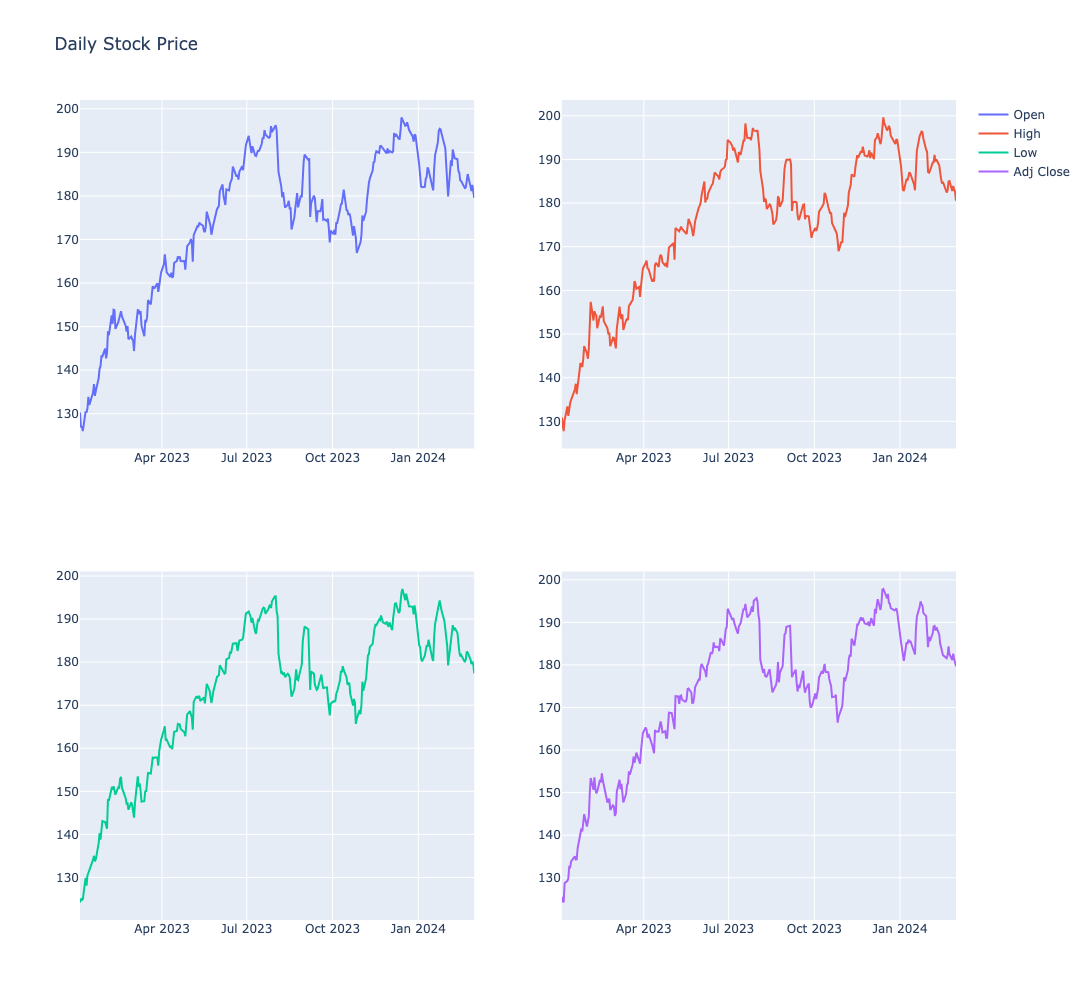

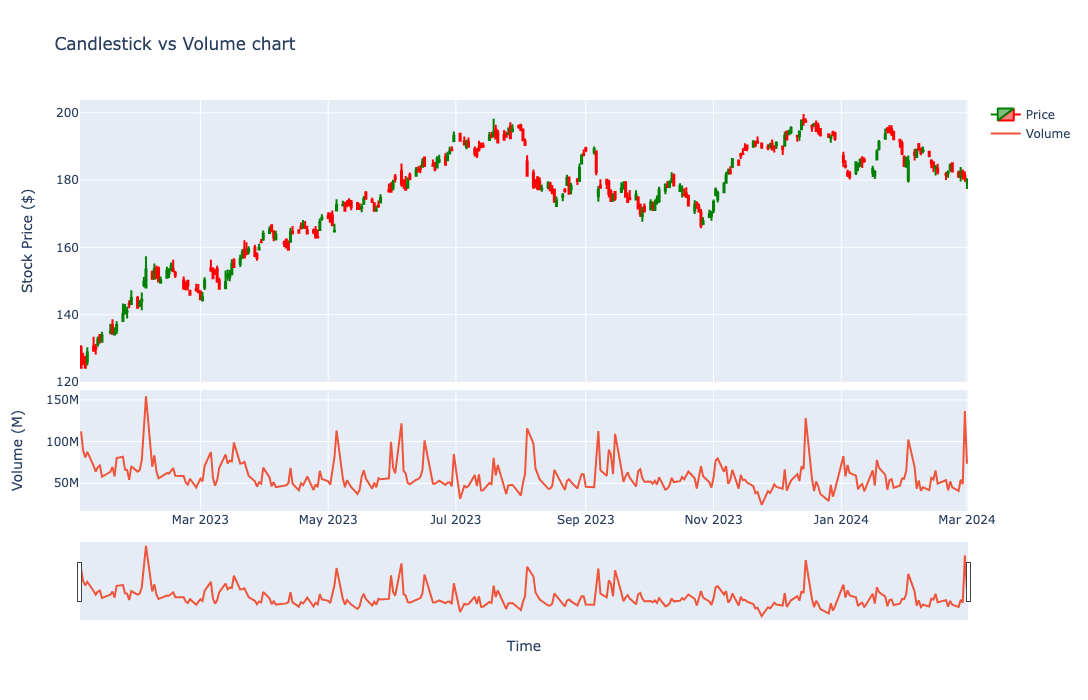

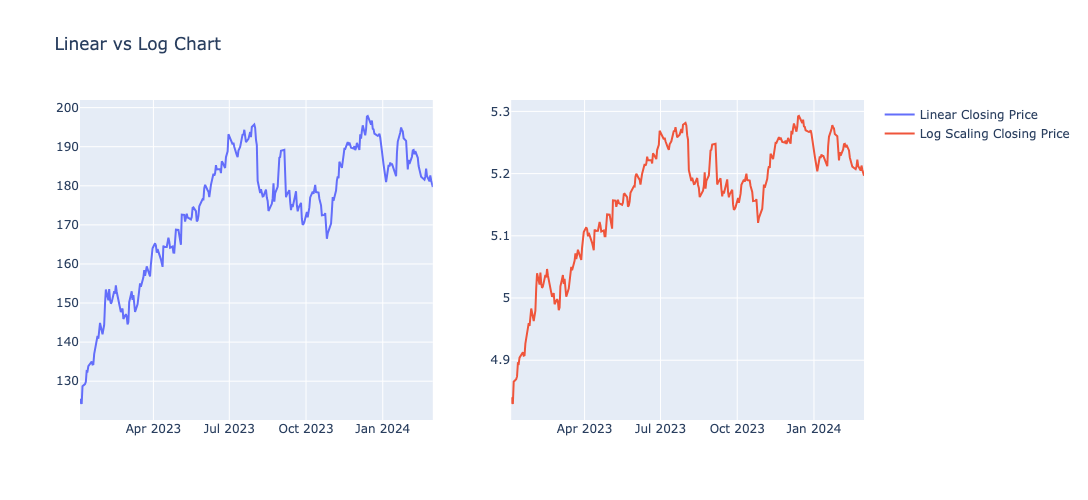

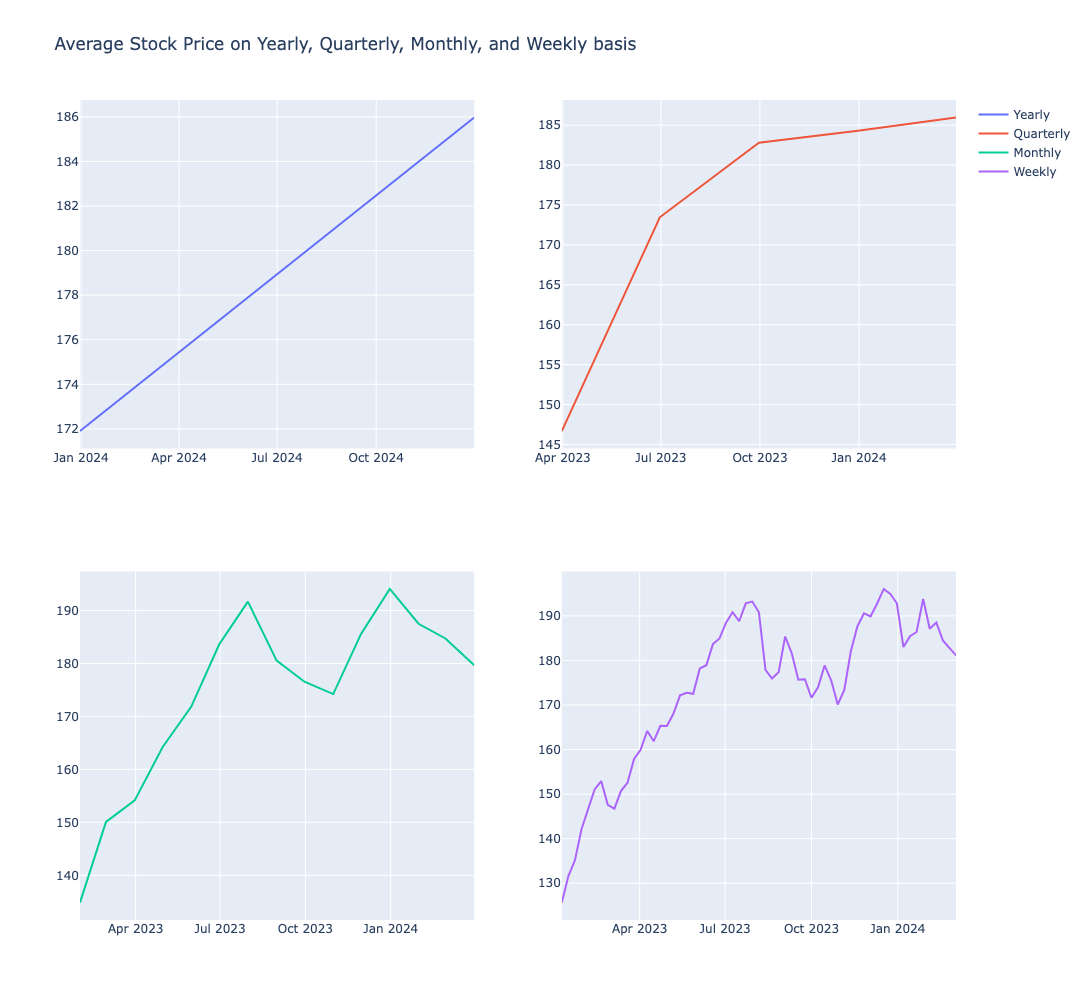

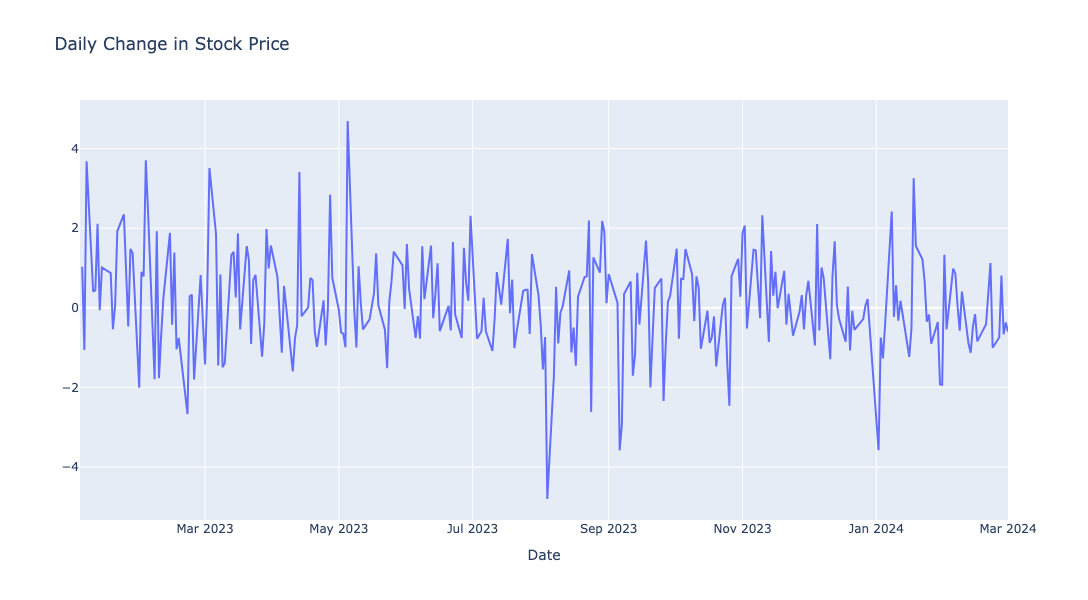

Top 10 dates with most significant PCT Change in Closing Price
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-04  185.520004  187.380005  181.919998  181.990005  181.274155   
2023-05-05  170.979996  174.300003  170.759995  173.570007  172.648468   
2023-02-02  148.899994  151.179993  148.169998  150.820007  149.790543   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.735229   
2023-09-06  188.399994  188.850006  181.470001  182.910004  182.436539   
2024-01-02  187.149994  188.440002  183.889999  185.639999  185.403412   
2023-03-03  148.039993  151.110001  147.330002  151.029999  150.228119   
2023-04-13  161.630005  165.800003  161.419998  165.559998  164.680969   
2024-01-18  186.089996  189.139999  185.830002  188.630005  188.389618   
2023-09-07  175.179993  178.210007  173.539993  177.559998  177.100388   

               Volume  Adj_Close_Change  Abs_Adj

In [22]:
stock_price_viz(test_data, '2023-01-01', '2024-03-01')